# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

In [1]:
!pip install easyagents >/dev/null

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


##### suppress package warnings, prepare matlab, if in colab: load additional packages for rendering

In [2]:
import sys
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

## Dry Run (very short training)

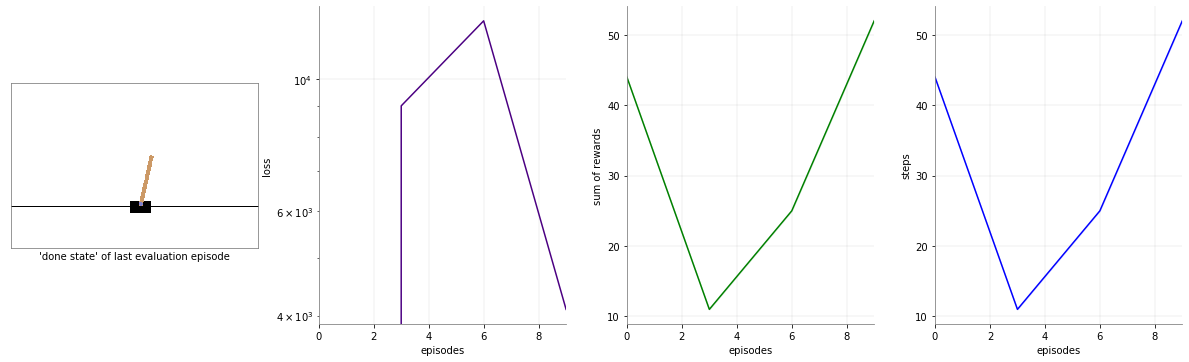

In [3]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingFast

ppoAgent = PpoAgent( gym_env_name='CartPole-v0', training=TrainingFast())
ppoAgent.train()

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

## Default training with a movie (on a self-defined network)

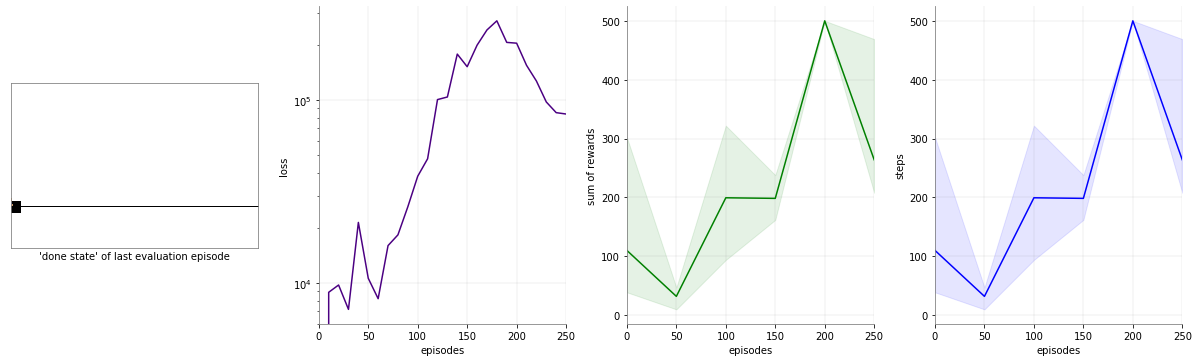

In [4]:
from easyagents.tfagents import PpoAgent

ppoAgent = PpoAgent( gym_env_name = 'CartPole-v0', fc_layers=(100, 50, 25) )
ppoAgent.train()

The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The 'sum of rewards' - as well as the steps - plot shows the evaluation of the current policy.
The line depicts the average sum of rewards over all games played during evaluation,
the area the corresponding min and max values.

Note: 
The policy evaluation is controlled through the Agent's training argument.
By default 10 evaluation episodes are used.
The training configuration TrainingFast() in the previous cell is set to 1 evaluation episode. 
Thus min, max and average are all equal and hence no area is visible.

### Replot the training statistics

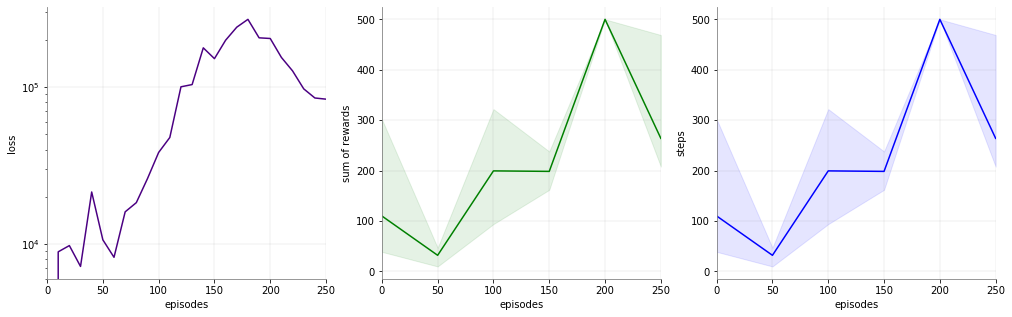

In [5]:
_ = ppoAgent.plot_episodes()

### Visualize the trained policy playing a game

In [6]:
ppoAgent.render_episodes_to_jupyter(num_episodes=1, fps=50)

W0728 12:22:51.544552 12168 ffmpeg.py:839] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (400, 600) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to None (risking incompatibility). You may also see a FFMPEG warning concerning speedloss due to data not being aligned.


## Next: Custom training (self-defined training scheme & logging)

* see [Berater on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_berater.ipynb)
  (an example of a gym environment implementation based on a routing problem)

